In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read dataset
dataset = pd.read_csv("UberDataset.csv")

In [7]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [9]:
# to check shape
dataset.shape

(1156, 7)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [11]:
dataset['PURPOSE'].fillna("NOT", inplace = True)

C:\Users\yashi\AppData\Local\Temp\ipykernel_14216\4083644620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace = True)


In [12]:
dataset.head

<bound method NDFrame.head of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1  

In [15]:
# replace datatype of start_date and end_Date
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [17]:
# create 2 new columns
from datetime import datetime
dataset['DATE'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['TIME'] = pd.DatetimeIndex(dataset['START_DATE']).hour
# OR
# dataset['DATE'] = dataset['START_DATE'].dt.date
# dataset['TIME'] = dataset['START_DATE'].dt.hour

In [20]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [21]:
# create new col and divide it into 4 catorgories
dataset['DAY_NIGHT'] = pd.cut(x=dataset['TIME'], bins=[0, 10, 15, 19, 24], labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

In [22]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [24]:
# Drop Null Values
dataset.dropna(inplace = True)

In [25]:
dataset.shape

(413, 10)

# Data Visualization

<Axes: xlabel='count', ylabel='PURPOSE'>

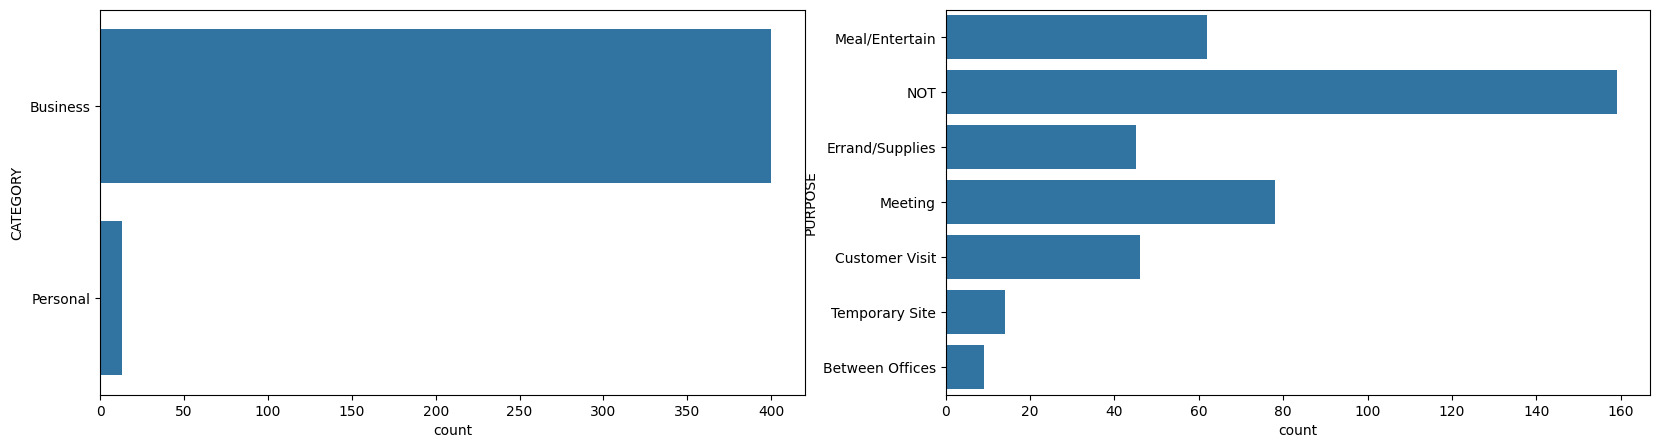

In [38]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])

<Axes: xlabel='count', ylabel='DAY_NIGHT'>

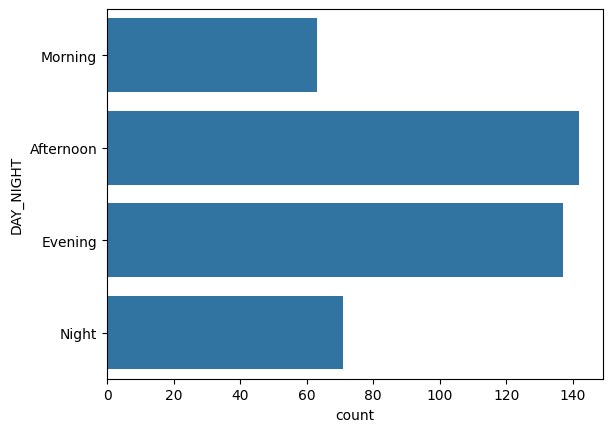

In [39]:
sns.countplot(dataset['DAY_NIGHT'])

In [42]:
 dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset['MONTH'] = dataset.MONTH.map(month_label)
mon = dataset.MONTH.value_counts(sort = False)

In [45]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNTS')]

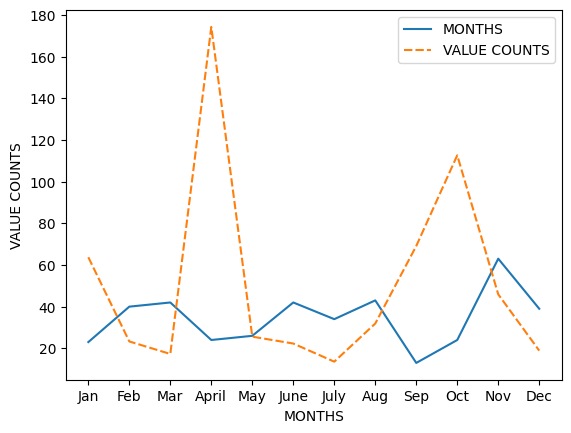

In [48]:
df = pd.DataFrame({
    "MONTHS": mon.values,
    "VALUE COUNTS": dataset.groupby('MONTH', sort = False)
    ['MILES'].max()
})
p = sns.lineplot(data = df)
p.set(xlabel = "MONTHS", ylabel = "VALUE COUNTS")

In [49]:
dataset['WEEKDAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1:'Tues', 2:'Wed', 3:'Thur',4:'Fri', 5:'Sat', 6:'Sun'
}
dataset['WEEKDAY'] = dataset['WEEKDAY'].map(day_label)

Text(0, 0.5, 'COUNT')

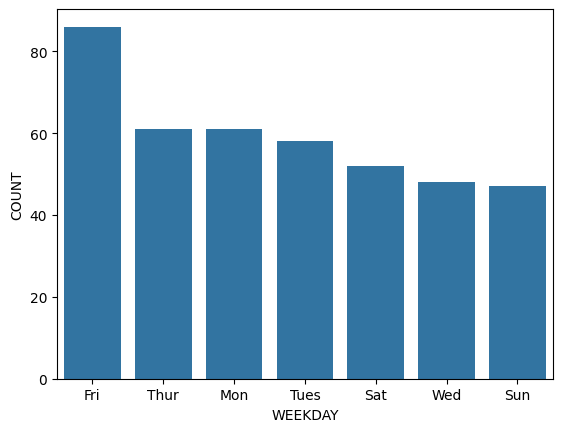

In [50]:
day_label = dataset.WEEKDAY.value_counts()
sns.barplot(x= day_label.index, y = day_label)
plt.xlabel('WEEKDAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

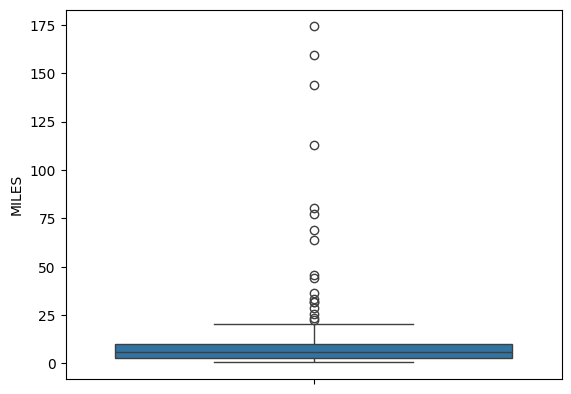

In [51]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

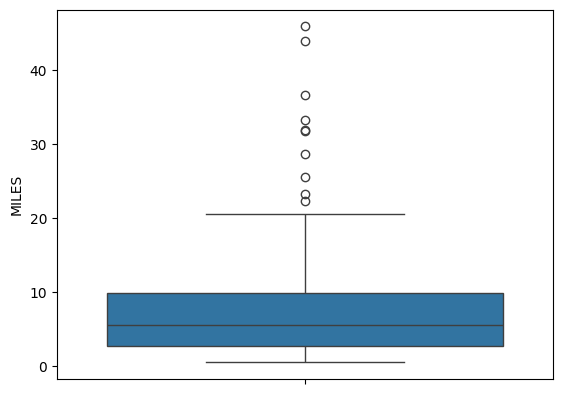

In [55]:
sns.boxplot(dataset[dataset['MILES']<50]['MILES'])

C:\Users\yashi\AppData\Local\Temp\ipykernel_14216\2722806006.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<50]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

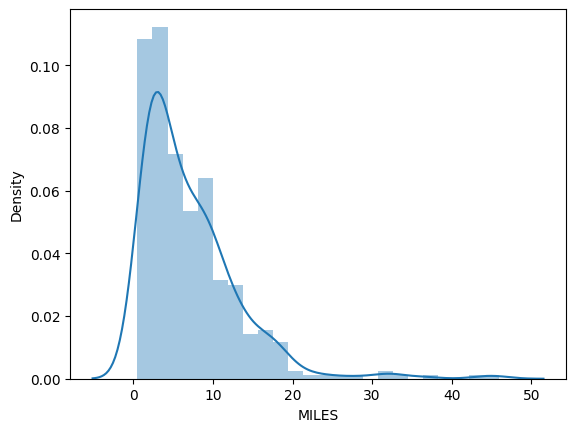

In [56]:
sns.distplot(dataset[dataset['MILES']<50]['MILES'])